In [461]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

In [462]:
xls = pd.ExcelFile("Election_Data.xlsx")
df = pd.read_excel(xls, "Election_Dataset_Two Classes")

In [463]:
#Data Ingestion

In [464]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [465]:
df.drop('Unnamed: 0',inplace =True, axis=1)

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [467]:
df.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
5,Labour,47,3,4,4,4,4,2,male
6,Labour,57,2,2,4,4,11,2,male
7,Labour,77,3,4,4,1,1,0,male
8,Labour,39,3,3,4,4,11,0,female
9,Labour,70,3,2,5,1,11,2,male


In [468]:
df.shape

(1525, 9)

In [469]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [470]:
df.duplicated().sum()

8

In [471]:
df.drop_duplicates(inplace=True)

In [472]:
df.duplicated().sum()

0

In [473]:
#EDA 

In [474]:
df['gender'].value_counts()

female    808
male      709
Name: gender, dtype: int64

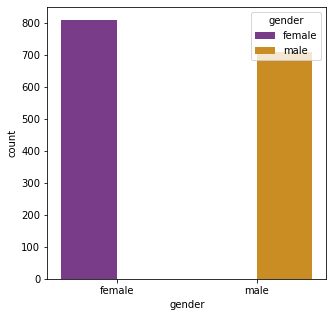

In [475]:
plt.figure(figsize=(5,5))
sns.countplot(x='gender' ,data=df, hue='gender', palette='CMRmap',);

In [476]:
df['vote'].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

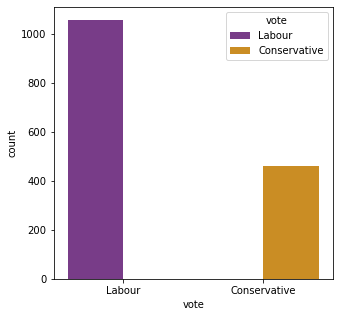

In [477]:
plt.figure(figsize=(5,5))
sns.countplot(x='vote' ,data=df, hue='vote', palette='CMRmap');

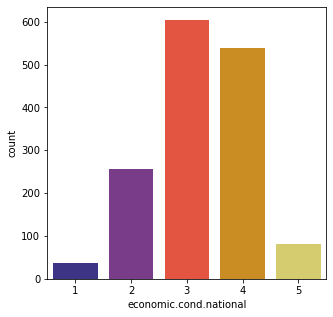

In [478]:
plt.figure(figsize=(5,5))
sns.countplot(x='economic.cond.national' ,data=df, palette='CMRmap');

In [479]:
df['economic.cond.national'].value_counts()

3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64

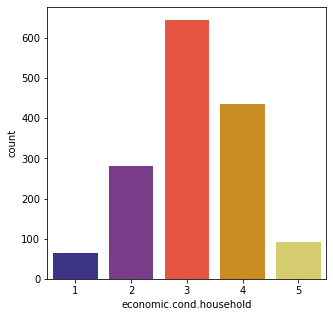

In [245]:
plt.figure(figsize=(5,5))
sns.countplot(x='economic.cond.household' ,data=df, palette='CMRmap');

In [480]:
df['economic.cond.household'].value_counts()

3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

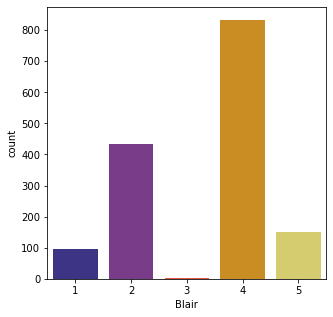

In [244]:
plt.figure(figsize=(5,5))
sns.countplot(x='Blair' ,data=df, palette='CMRmap');

In [481]:
df['Blair'].value_counts()

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

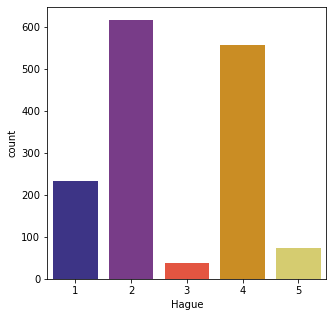

In [241]:
plt.figure(figsize=(5,5))
sns.countplot(x='Hague' ,data=df, palette='CMRmap');

In [482]:
df['Hague'].value_counts()

2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64

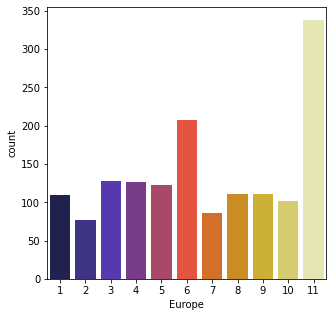

In [240]:
plt.figure(figsize=(5,5))
sns.countplot(x='Europe' ,data=df, palette='CMRmap');

In [483]:
df['Europe'].value_counts()

11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64

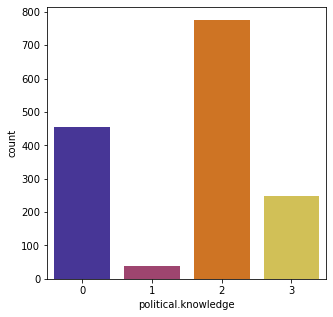

In [253]:
plt.figure(figsize=(5,5))
sns.countplot(x='political.knowledge' ,data=df, palette='CMRmap');

In [484]:
df['political.knowledge'].value_counts()

2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64

In [485]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [486]:
df.skew(axis=0, numeric_only=True)

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

In [487]:
df.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
5,Labour,47,3,4,4,4,4,2,male
6,Labour,57,2,2,4,4,11,2,male
7,Labour,77,3,4,4,1,1,0,male
8,Labour,39,3,3,4,4,11,0,female
9,Labour,70,3,2,5,1,11,2,male


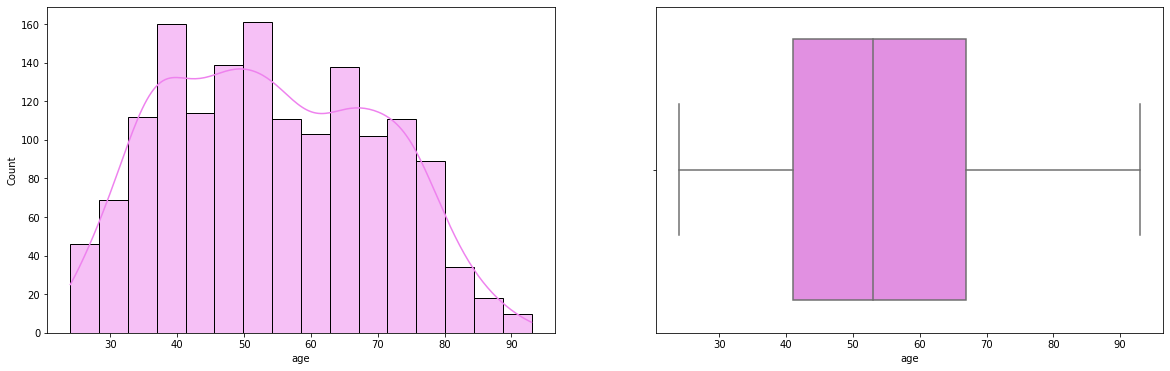

In [488]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'age' ,data=df, kde=True, ax=axs[0], color='violet')
sns.boxplot(x='age',data=df, color='violet');

In [489]:
#multimodal ages. 

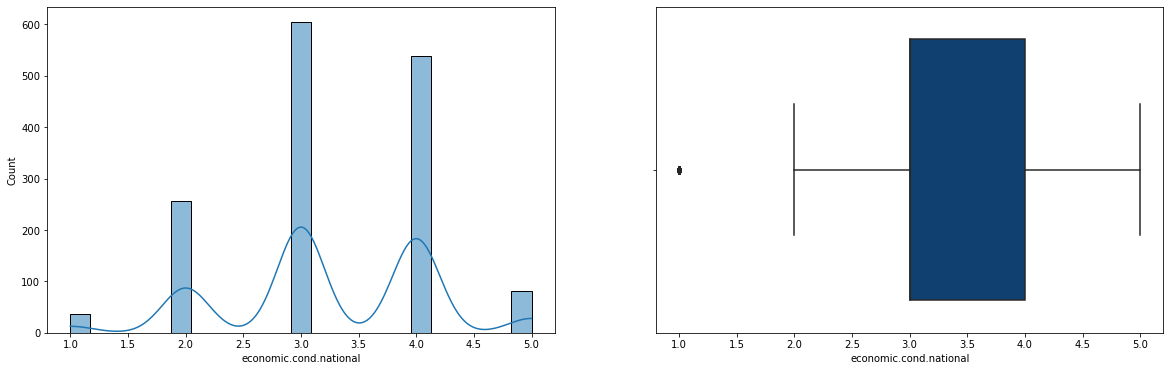

In [490]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'economic.cond.national' ,data=df, kde=True, ax=axs[0], palette='ocean')
sns.boxplot(x='economic.cond.national',data=df, palette='ocean');

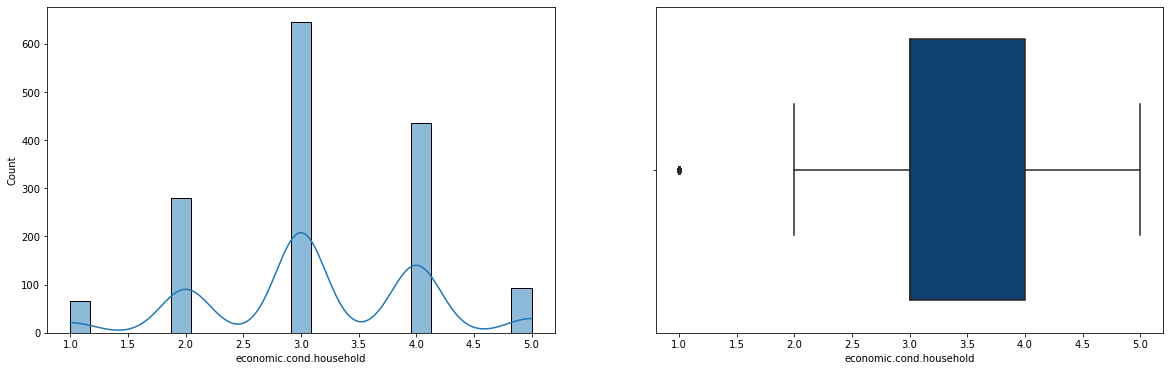

In [491]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'economic.cond.household' ,data=df, kde=True, ax=axs[0], palette='ocean')
sns.boxplot(x='economic.cond.household',data=df, palette='ocean');

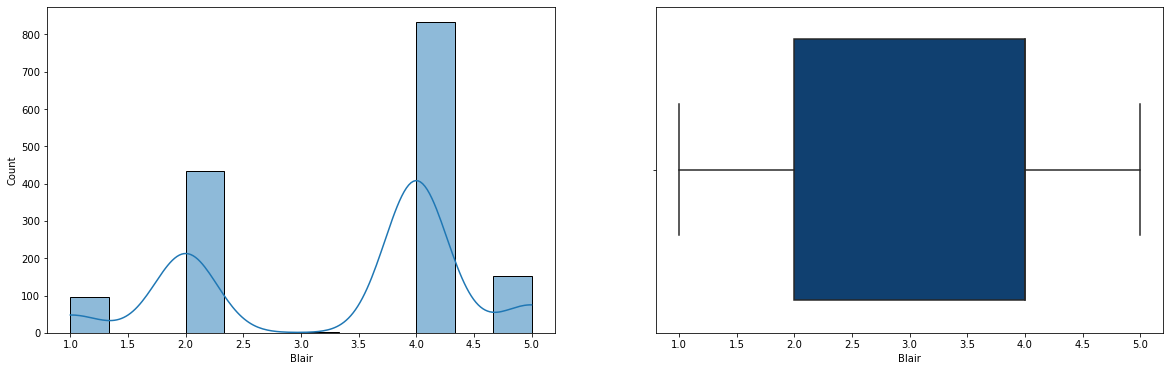

In [492]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'Blair' ,data=df, kde=True, ax=axs[0], palette='ocean')
sns.boxplot(x='Blair',data=df, palette='ocean');

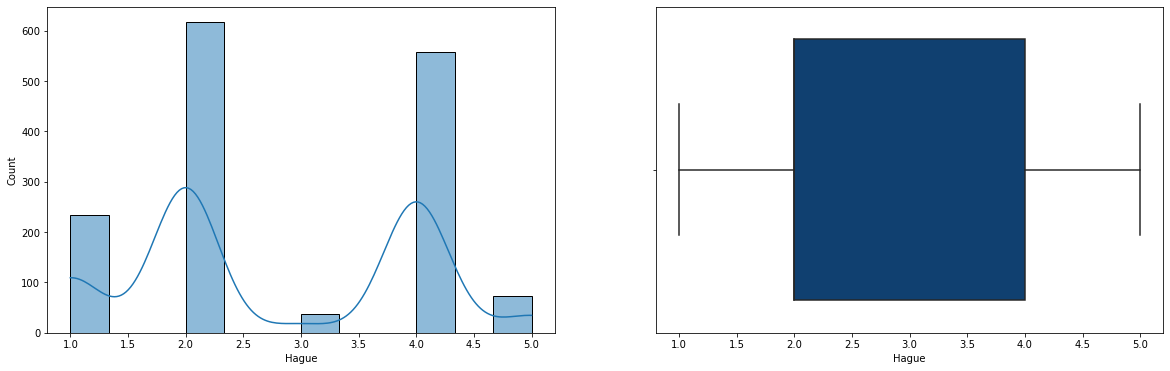

In [493]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'Hague' ,data=df, kde=True, ax=axs[0], palette='ocean')
sns.boxplot(x='Hague',data=df, palette='ocean');

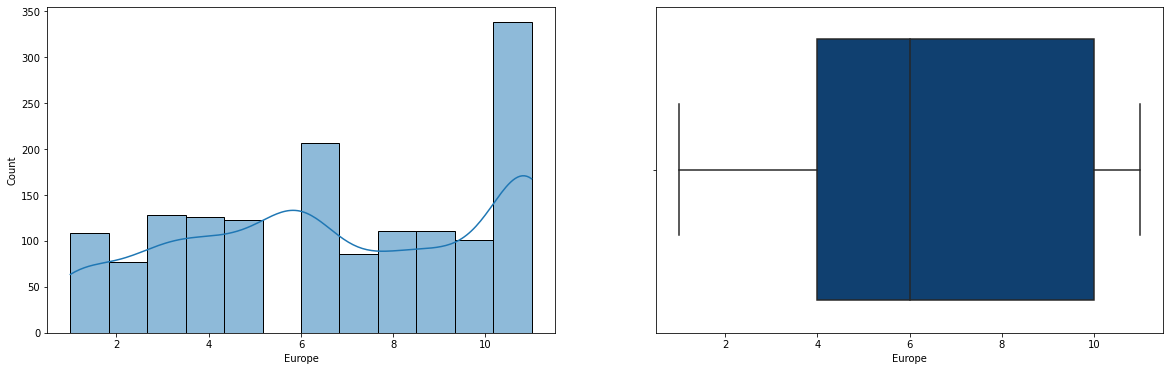

In [494]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'Europe' ,data=df, kde=True, ax=axs[0], palette='ocean')
sns.boxplot(x='Europe',data=df, palette='ocean');

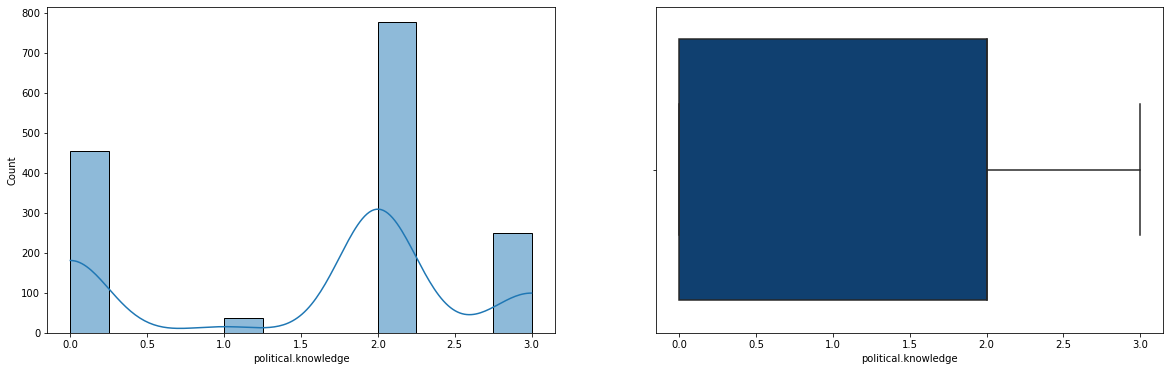

In [495]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(20,6))
sns.histplot(x= 'political.knowledge' ,data=df, kde=True, ax=axs[0], palette='ocean')
sns.boxplot(x='political.knowledge',data=df, palette='ocean');

In [496]:
##outlier detection
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [497]:
out_iqr(df,'age')

The IQR is 26.0
The lower bound value is 2.0
The upper bound value is 106.0
Total number of outliers are 0


In [498]:
out_iqr(df,'economic.cond.national')

The IQR is 1.0
The lower bound value is 1.5
The upper bound value is 5.5
Total number of outliers are 37


In [499]:
out_iqr(df,'economic.cond.household')

The IQR is 1.0
The lower bound value is 1.5
The upper bound value is 5.5
Total number of outliers are 65


In [500]:
out_iqr(df,'Blair')

The IQR is 2.0
The lower bound value is -1.0
The upper bound value is 7.0
Total number of outliers are 0


In [501]:
out_iqr(df,'Hague')

The IQR is 2.0
The lower bound value is -1.0
The upper bound value is 7.0
Total number of outliers are 0


In [502]:
out_iqr(df,'Europe')

The IQR is 6.0
The lower bound value is -5.0
The upper bound value is 19.0
Total number of outliers are 0


In [503]:
out_iqr(df,'political.knowledge')

The IQR is 2.0
The lower bound value is -3.0
The upper bound value is 5.0
Total number of outliers are 0


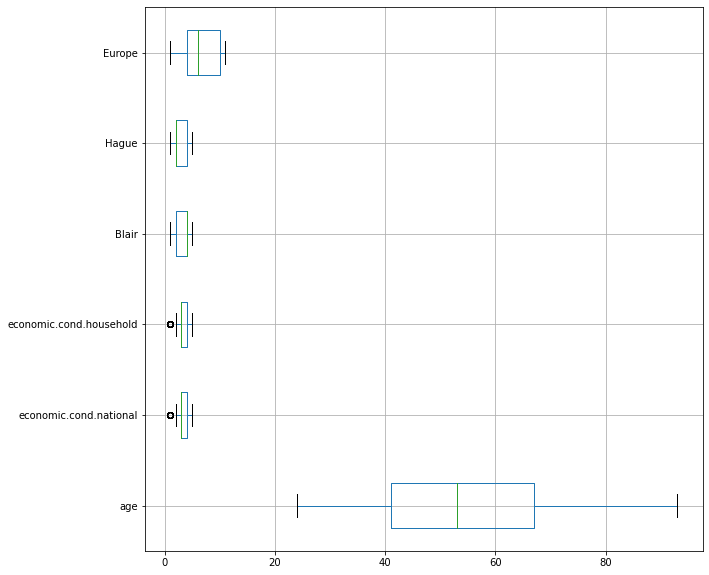

In [504]:
plt.figure(figsize=(10,10))
df.iloc[:,:7].boxplot(vert=0)
plt.show()

In [505]:
#Bivariate analysis

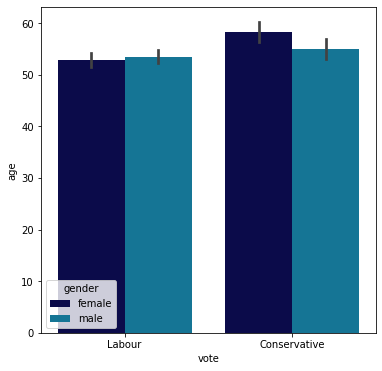

In [506]:
plt.figure(figsize=(6,6))
sns.barplot(x='vote', y='age', hue= 'gender', data= df, palette='ocean');

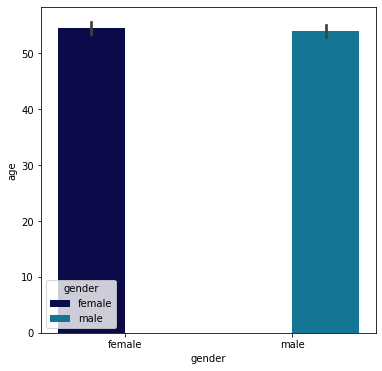

In [507]:
plt.figure(figsize=(6,6))
sns.barplot(x='gender', y='age', hue= 'gender', data= df, palette='ocean');

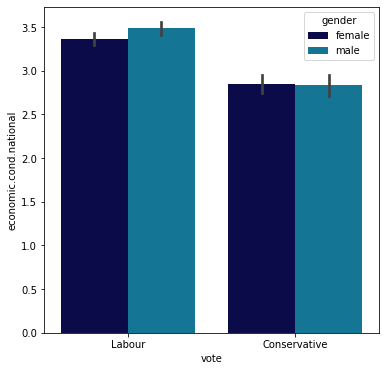

In [508]:
plt.figure(figsize=(6,6))
sns.barplot(x='vote', y='economic.cond.national', hue= 'gender', data= df, palette='ocean');

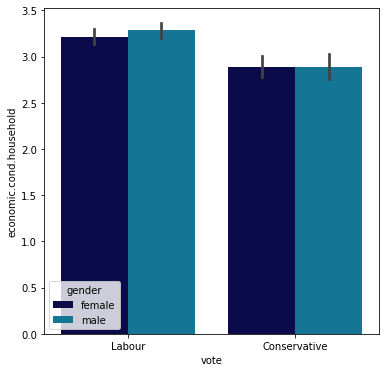

In [509]:
plt.figure(figsize=(6,6))
sns.barplot(x='vote', y='economic.cond.household', hue= 'gender', data= df, palette='ocean');

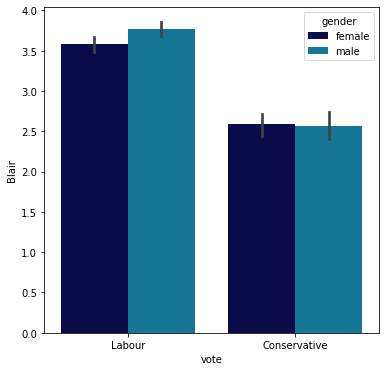

In [510]:
plt.figure(figsize=(6,6))
sns.barplot(x='vote', y='Blair', hue= 'gender', data= df, palette='ocean');

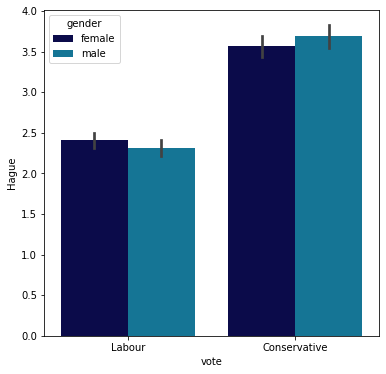

In [511]:
plt.figure(figsize=(6,6))
sns.barplot(x='vote', y='Hague', hue= 'gender', data= df, palette='ocean');

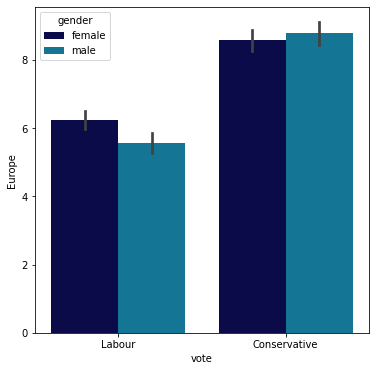

In [512]:
plt.figure(figsize=(6,6))
sns.barplot(x='vote', y='Europe', hue= 'gender', data= df, palette='ocean');

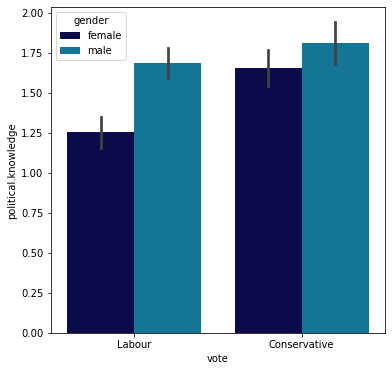

In [513]:
plt.figure(figsize=(6,6))
sns.barplot(x='vote', y='political.knowledge', hue= 'gender', data= df, palette='ocean');

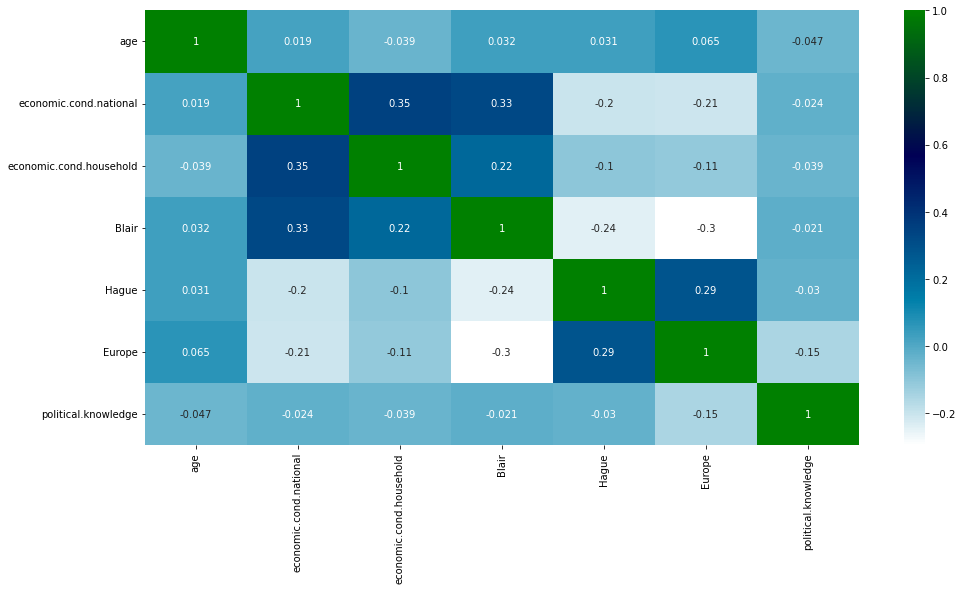

In [514]:
plt.figure(figsize=(16,8))
corr= df.corr()
sns.heatmap(data= corr, annot=True, cmap= 'ocean_r' )
plt.show();

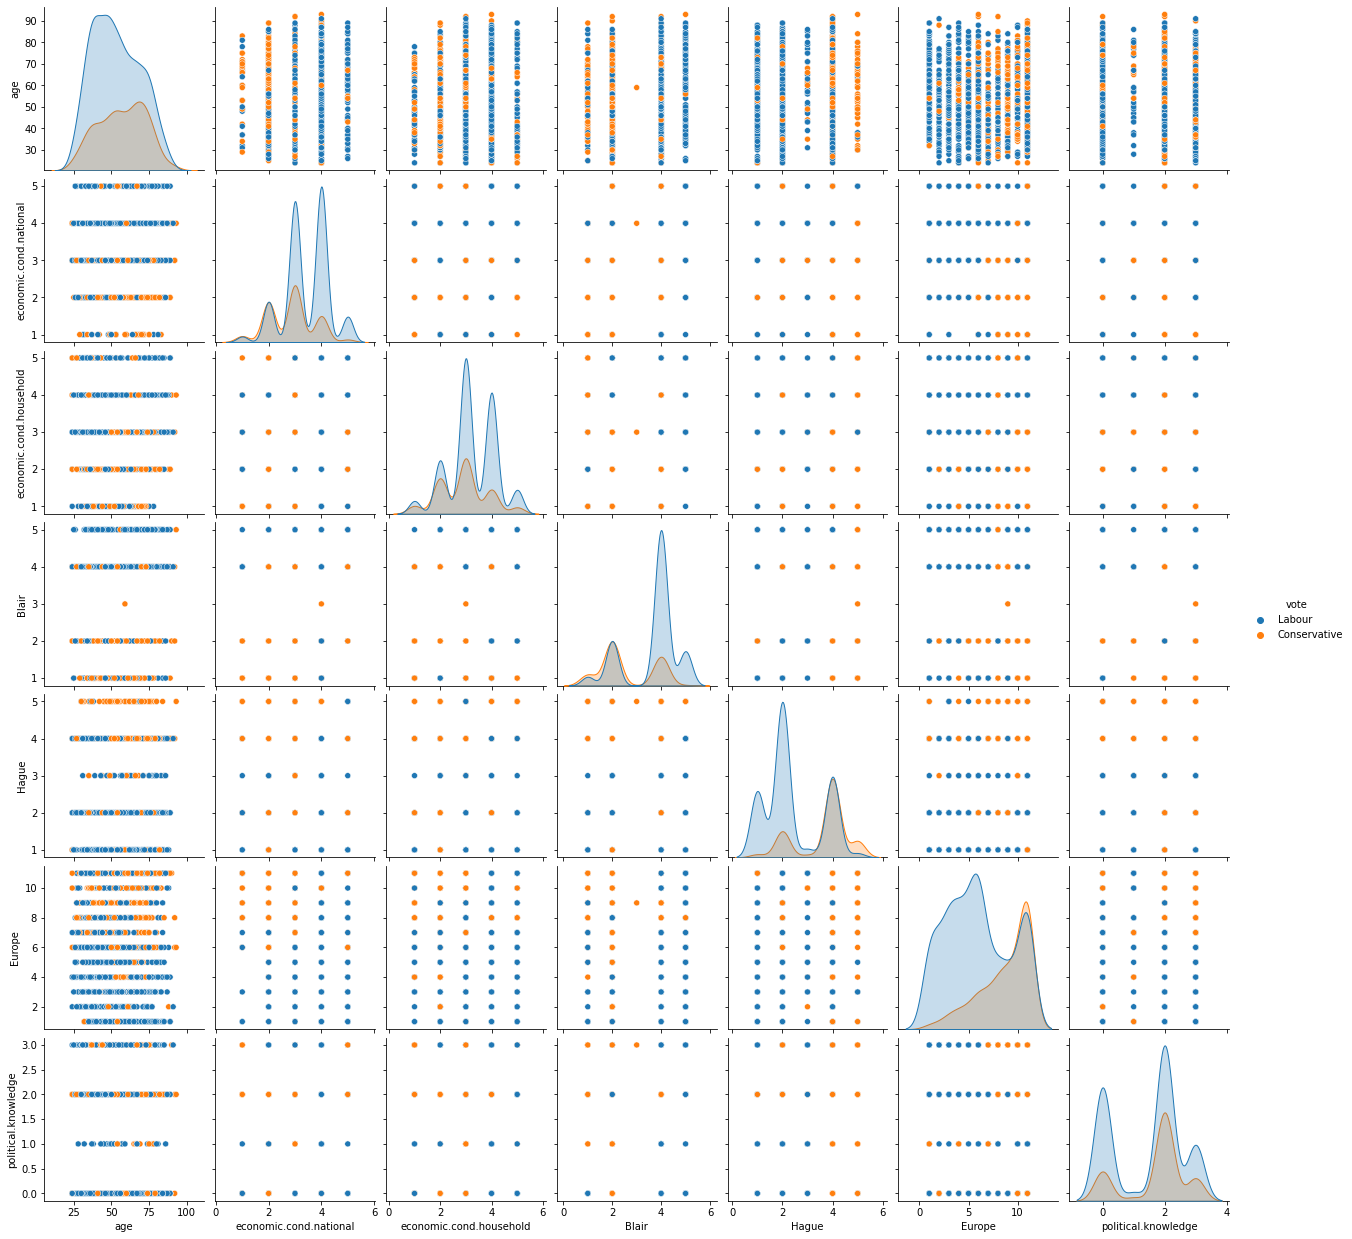

In [515]:
sns.pairplot(data= df, hue='vote')  
plt.show()

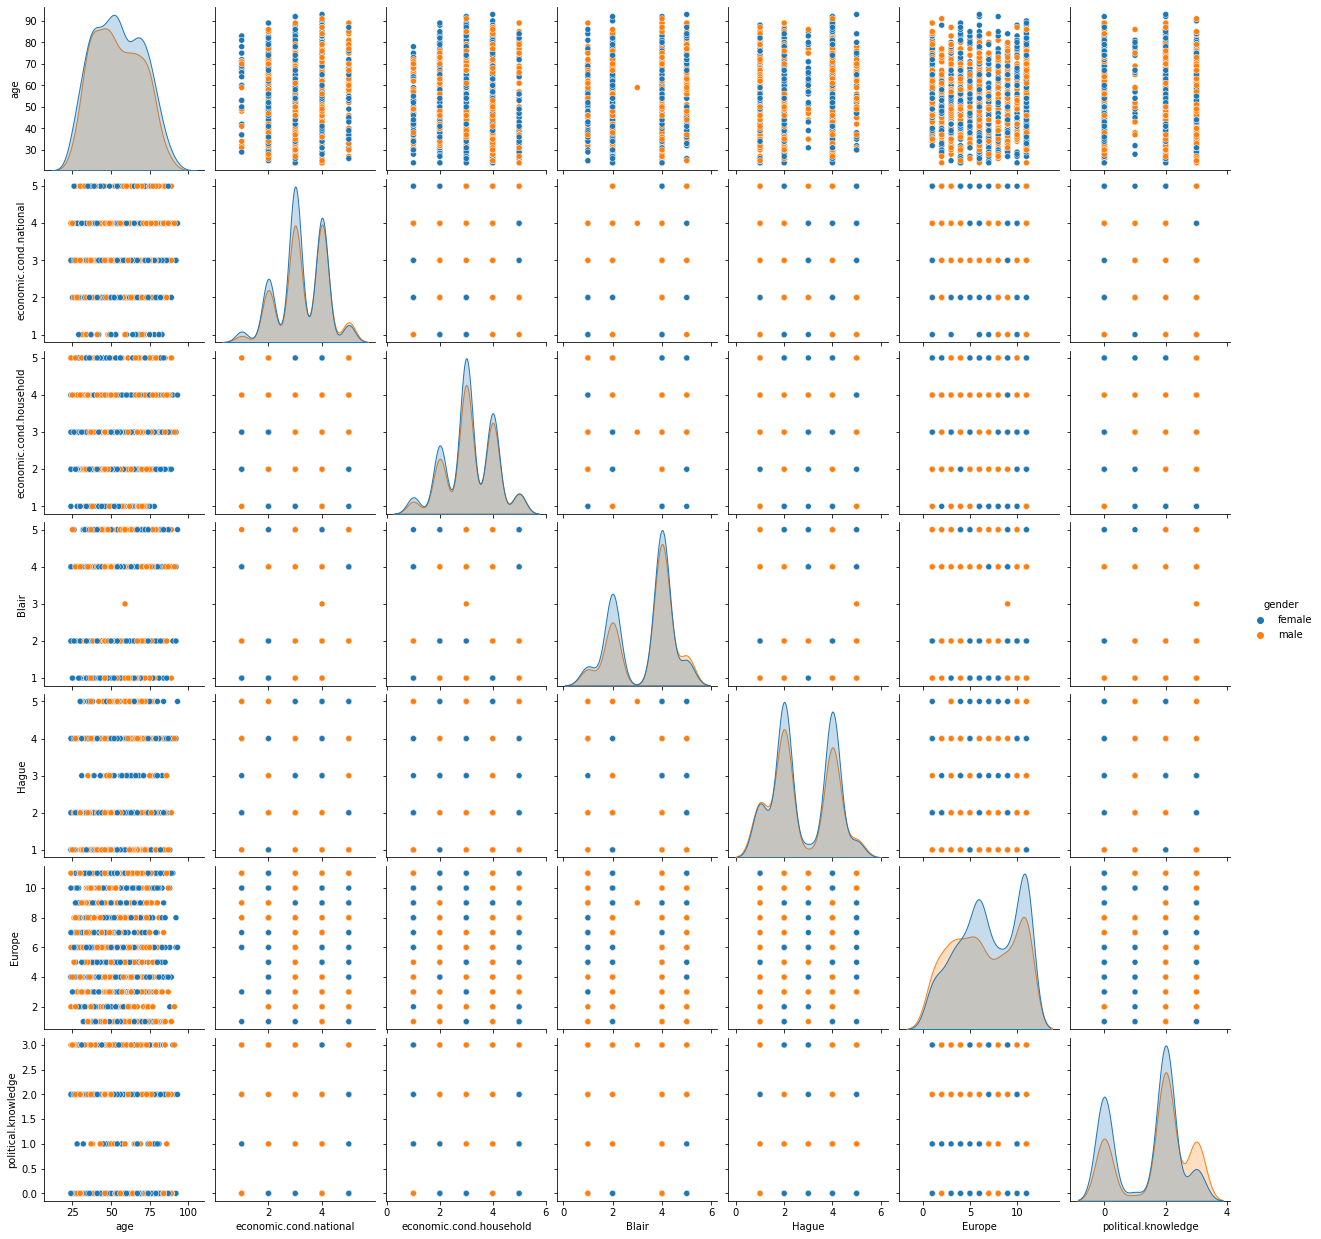

In [516]:
sns.pairplot(data= df, hue='gender')  
plt.show()

In [517]:
#Data Preparation for Modelling

In [518]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [519]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 130.1 KB


In [521]:
from sklearn.preprocessing import minmax_scale
import pandas as pd
 
df_scaled = minmax_scale(df[['age']], feature_range=(0,1))
 
df['age(Norm)']=df_scaled[:,0]
df.drop('age',inplace =True, axis=1)

In [522]:
df.head()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age(Norm)
0,1,3,3,4,1,2,2,0,0.275362
1,1,4,4,4,4,5,2,1,0.173913
2,1,4,4,5,2,3,2,1,0.159420
3,1,4,2,2,1,4,0,0,0.000000
4,1,2,2,1,1,6,2,1,0.246377


In [523]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = df[['vote']]

In [524]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [525]:
X_train.shape

(1061, 8)

In [526]:
X_test.shape

(456, 8)

In [527]:
y_train.shape

(1061, 1)

In [528]:
y_test.shape

(456, 1)

In [529]:
X_train.head()

,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age(Norm)
991,2,4,1,4,11,2,0,0.144928
1274,4,3,4,4,6,0,1,0.231884
649,4,3,4,4,7,2,0,0.536232
677,3,3,4,2,11,0,1,0.333333
538,5,3,4,2,8,0,1,0.289855


In [530]:
y_train.head()

,vote
991,0
1274,1
649,0
677,1
538,1


### Logistic Regression Model

In [531]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [532]:
## Regular Model

In [533]:
LR_model = LogisticRegression(solver='liblinear',max_iter=1000)
LR_model.fit(X_train, y_train)

C:\Users\Honey Sam\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, solver='liblinear')

In [534]:
ytrain_predict = LR_model.predict(X_train)
ytest_predict = LR_model.predict(X_test)

In [535]:
# Accuracy - Training Data
LR_model.score(X_train, y_train)

0.8360037700282752

In [536]:
# Accuracy - Test Data
LR_model.score(X_test, y_test)

0.8289473684210527

In [537]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.64      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [538]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [539]:
print(metrics.confusion_matrix(y_train,ytrain_predict))

[[196 111]
 [ 63 691]]


In [540]:
print(metrics.confusion_matrix(y_test,ytest_predict))

[[110  43]
 [ 35 268]]


In [582]:
probs = LR_model.predict(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
## Fine Tuning of Logistic Regression using Grid Search

In [ ]:
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}]
LR_model = LogisticRegression()
    
LR_GridCV = GridSearchCV(estimator= LR_model, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [ ]:
LR_GridCV.fit(X_train, y_train)

### Linear Discriminant Analysis

In [542]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(X_train, y_train)

C:\Users\Honey Sam\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [543]:
pred_class_train = clfLDA.predict(X_train)

In [544]:
pred_class_test = clfLDA.predict(X_test)

In [545]:
clfLDA.score(X_train, y_train)

0.8341187558906692

In [546]:
clfLDA.score(X_test, y_test)

0.8333333333333334

In [547]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [548]:
print(metrics.confusion_matrix(y_train,pred_class_train))

[[200 107]
 [ 69 685]]


In [549]:
print(metrics.confusion_matrix(y_test,pred_class_test))

[[111  42]
 [ 34 269]]


In [550]:
## Fine tuning of lDA using Grid Search

In [551]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [552]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

C:\Users\Honey Sam\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [553]:
NB_train = NB_model.predict(X_train)
NB_test = NB_model.predict(X_test)

In [554]:
NB_model.score(X_train, y_train)

0.8350612629594723

In [555]:
NB_model.score(X_test, y_test)

0.8223684210526315

In [556]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,NB_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,NB_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456
 



In [557]:
print(metrics.confusion_matrix(y_train,NB_train))

[[211  96]
 [ 79 675]]


In [558]:
print(metrics.confusion_matrix(y_test, NB_test))

[[112  41]
 [ 40 263]]


In [559]:
### Naive BAYE Fine tuning of the Model using Grid Search

### KNN Model

In [560]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [561]:
ss=StandardScaler()
X_train_scaled=ss.fit_transform(X_train) #scaling the data since KNN is a distance based algorithm.
X_test_scaled=ss.transform(X_test)

In [562]:
clfKNN=KNeighborsClassifier()
clfKNN.fit(X_train_scaled,y_train)

C:\Users\Honey Sam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [563]:
y_pred=clfKNN.predict(X_test_scaled)
model_scoreKNN = clfKNN.score(X_test_scaled, y_test)
print(model_scoreKNN)

0.8245614035087719


In [564]:
model_scoreKNN = clfKNN.score(X_train_scaled, y_train)
print(model_scoreKNN)

0.8539114043355325


In [565]:
print(metrics.confusion_matrix(y_test, y_pred))

[[108  45]
 [ 35 268]]


In [566]:
## Fine tuning KNN Model required. 

In [575]:
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_pred),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456
 



In [576]:
print('Classification Report of the training data:\n\n',metrics.classification_report(X_train_scaled, y_train),'\n')

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

### Bagging Model

In [567]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,random_state=1) #BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

C:\Users\Honey Sam\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [568]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.8179824561403509
[[108  45]
 [ 38 265]]


In [577]:
print(bgcl.score(X_train , y_train))

1.0


In [569]:
## Fine Tuning of Bagging Model required to be done

In [570]:
from sklearn.ensemble import AdaBoostClassifier

clfADB = AdaBoostClassifier(n_estimators=100)
clfADB.fit(X_train,y_train)
y_pred=clfADB.predict(X_test)
model_scoreADB = clfADB.score(X_test, y_test)
print(model_scoreADB)
print(metrics.confusion_matrix(y_test, y_pred))

C:\Users\Honey Sam\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8135964912280702
[[103  50]
 [ 35 268]]


In [579]:
model_scoreADB = clfADB.score(X_train, y_train)
print(model_scoreADB)

0.8501413760603205


In [580]:
print('Classification Report of the training data:\n\n',metrics.classification_report(X_train, y_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_pred),'\n')

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [571]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

C:\Users\Honey Sam\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [572]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.8267543859649122
[[102  51]
 [ 28 275]]


In [581]:
print(gbcl.score(X_train, y_train))

0.8803016022620169


In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,NB_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,NB_test),'\n')